In [23]:
%matplotlib notebook

In [24]:
import numpy as np
from multiprocessing import Pool
import matplotlib.pyplot as plt
from mtc_simu_proc import *

In [25]:
def initial_state(size,radius,vol_ratio,max_r=None,resolution=1):
    # here assume the ball is hexogonal aligned within the box, 
    # number of particle determined by vol_ratio
    # assume maximum radius is 6
    if isinstance(max_r,type(None)):
        max_r = radius*1.1
    else:
        max_r = max_r
    # ball radius should be less or equal to max_r
    box_area  = size**2
    n = int((box_area/(np.pi*radius**2)*vol_ratio))
    ax = size/(n*3**0.5/2)**.5*0.99
    ix = int(np.round(size/ax))
    iy = int(np.round(size/ax*2/3**0.5))
    ay = ax*3**0.5*0.49
    x0 = []
    y0 = []
    j  = 0
    i  = 0
    pn = 0 # particle number
    xpos = 0
    ypos = 0
    while pn < n:
        #print(j)
        if j%2 == 0:
            xpos = i*ax+radius 
            ypos = j*ay+radius
            if (size - xpos) > radius:
                x0.append(i*ax+radius)
                #print(i*ax+radius)
                y0.append(j*ay+radius)
                i  += 1
                pn += 1
            else:
                j += 1
                i = 1
                x0.append(0.5*ax+radius)
                y0.append(j*ay+radius)
                pn += 1
        else:
            xpos = i*ax+0.5*ax+radius 
            ypos = j*ay+radius
            if (size - xpos) > 2*radius:
                x0.append(i*ax+0.5*ax+radius)
                y0.append(j*ay+radius)
                i  += 1
                pn += 1
            elif 0 <= (size - xpos) < 2*radius:
                x0.append(i*ax+0.5*ax+radius)
                y0.append(j*ay+radius)
                x0.append(i*ax+0.5*ax+radius-size)
                y0.append(j*ay+radius)
                j  += 1
                i  = 0
                pn += 1
            else:
                i  = 0
                j  += 1
                x0.append(i*ax+radius)
                y0.append(j*ay+radius)
                i  += 1
                pn += 1
        
    xx,yy = np.meshgrid(np.arange(0,int(size),resolution),
                        np.arange(0,int(size),resolution))
    im = xx*0
    for i in range(n):
        xx1 = xx - x0[i]
        yy1 = yy - y0[i]
        rr  = np.sqrt(xx1**2+yy1**2)
        im1 = (rr<=radius).astype(int)
        im += im1
    return im,x0,y0,xx,yy

In [26]:
radius    = 5
max_r     = 6
vol_ratio = 0.5
size = 251
im,x0,y0,xx,yy = initial_state(size,radius,vol_ratio,max_r=max_r)

<IPython.core.display.Javascript object>


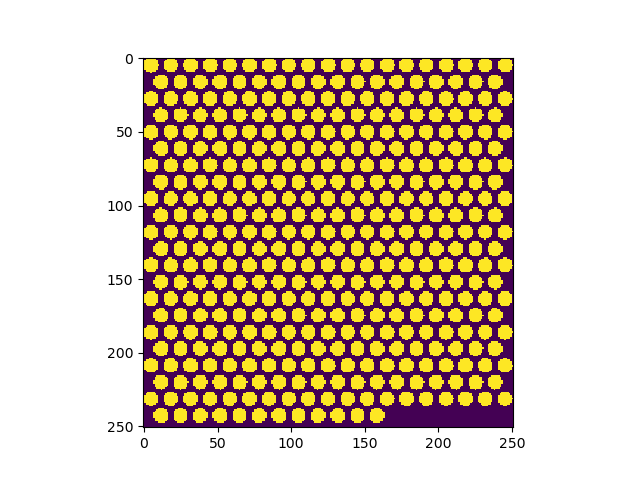

0.4974841669179854

In [27]:
plt.subplots()
plt.imshow(im)
(np.sum(im)/size**2)

In [28]:
x0_old = np.copy(x0)
y0_old = np.copy(y0)

In [29]:
def check_edge_condition(x0,y0,size,radius):
    return

def random_walk(iteration,step,x0,y0,im,xx,yy,radius,size):
    
    for j in range(iteration):
        for i in range(len(x0)):
            x_old = np.copy(x0[i])
            y_old = np.copy(y0[i])
            u   = np.random.uniform(0,1,1)*step
            phi = np.radians(np.random.uniform(0,360,1))
            x_new = np.copy(x0[i]) + u*np.cos(phi)
            y_new = np.copy(y0[i]) + u*np.sin(phi)
            
            #considering particle close to edge or leave box from one side will enter from another side
            if x_new > size:
                x_new = x_new - size
            if y_new > size:
                y_new = y_new - size
                
            if x_new < 0:
                x_new = x_new + size
            if y_new < 0:
                y_new = y_new + size
                
            #if x_new < radius:
            #    x_new1 = size + x_new
            #else:
            #    x_new1 = x_new
            #if y_new < radius:
            #    y_new1 = size + y_new
            #else:
            #    y_new1 = y_new
            #if (size-x_new) < radius:
            #    x_new2 = x_new - size
            #else:
            #    x_new2 = x_new
            #if (size-y_new) < radius:
            #    y_new2 = y_new - size
            #else:
            #    y_new2 = y_new
                
            x_new_array = np.delete(x0,i) - x_new
            y_new_array = np.delete(y0,i) - y_new
            dist = (x_new_array**2+y_new_array**2)**.5
                
            if np.size(dist[dist<radius*2]) > 0:
                #print(np.size(dist[dist<radius*2]))
                #print(1)
                x0[i] = x_old
                y0[i] = y_old
            #elif (x_new1!=x_new) or (y_new1!= y_new):
            #    x_new_array1 = np.delete(x0,i) - x_new1
            #    y_new_array1 = np.delete(y0,i) - y_new1
            #    dist1 = (x_new_array1**2+y_new_array1**2)**.5
            #    if np.size(dist1[dist1<radius*2]) > 0:
            #        x0[i] = x_old
            #        y0[i] = y_old
            #    else:
            #        x0[i] = x_new
            #        y0[i] = y_new
            #elif (x_new2!=x_new) or (y_new2!= y_new):
            #    x_new_array2 = np.delete(x0,i) - x_new2
            #    y_new_array2 = np.delete(y0,i) - y_new2
            #    dist2 = (x_new_array2**2+y_new_array2**2)**.5
            #    if np.size(dist2[dist2<radius*2]) > 0:
            #        x0[i] = x_old
            #        y0[i] = y_old
            #    else:
            #        x0[i] = x_new
            #        y0[i] = y_new
            else:                
                x0[i] = x_new
                y0[i] = y_new
        if j%100 == 0:
            print(f'{j} iterations finished')
            
    im = xx*0
    for i in range(len(x0)):
        xx1 = xx - x0[i]
        yy1 = yy - y0[i]
        rr  = np.sqrt(xx1**2+yy1**2)
        im1 = (rr<=radius).astype(int)
        im += im1             
    return im,x0,y0

In [30]:
iteration = 2000
step = max_r/3
x0   = x0
y0   = y0
im   = im
xx   = xx
yy   = yy
radius = radius
size   = size
im_new,x0_new,y0_new = random_walk(iteration,step,x0,y0,im,xx,yy,radius,size)

0 iterations finished
100 iterations finished
200 iterations finished
300 iterations finished
400 iterations finished
500 iterations finished
600 iterations finished
700 iterations finished
800 iterations finished
900 iterations finished
1000 iterations finished
1100 iterations finished
1200 iterations finished
1300 iterations finished
1400 iterations finished
1500 iterations finished
1600 iterations finished
1700 iterations finished
1800 iterations finished
1900 iterations finished


<IPython.core.display.Javascript object>


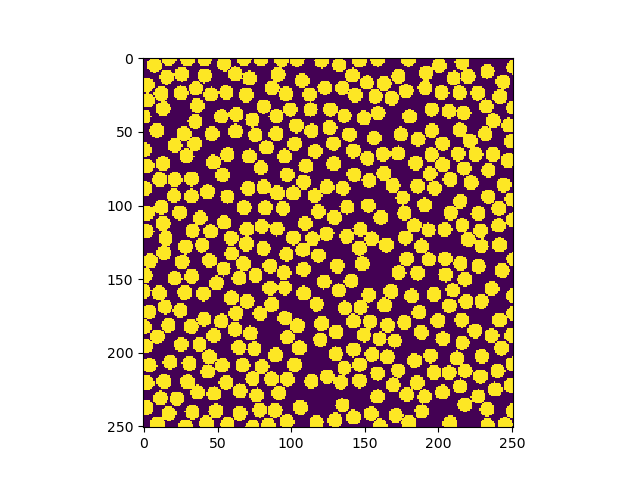

In [31]:
plt.subplots()
plt.imshow(im_new)

In [11]:
a = np.arange(10)
print(np.delete(a,2))

[0 1 3 4 5 6 7 8 9]


np.sum(im)/251**2,np.sum(im_new)/251**2

i = 250
(x0[i],x0_old[i],x0_new[i])

len(x0),len(x0_old)

In [39]:
xx

array([[ 0.  ,  0.28,  0.56, ..., 69.44, 69.72, 70.  ],
       [ 0.  ,  0.28,  0.56, ..., 69.44, 69.72, 70.  ],
       [ 0.  ,  0.28,  0.56, ..., 69.44, 69.72, 70.  ],
       ...,
       [ 0.  ,  0.28,  0.56, ..., 69.44, 69.72, 70.  ],
       [ 0.  ,  0.28,  0.56, ..., 69.44, 69.72, 70.  ],
       [ 0.  ,  0.28,  0.56, ..., 69.44, 69.72, 70.  ]])

In [37]:
xx = xx*1.4/5
yy = yy*1.4/5

In [9]:
#q,I1,I2,im,im_new = load_mtc_proc_data('mtc_saxs_r1p8_vr50.npz')

<IPython.core.display.Javascript object>


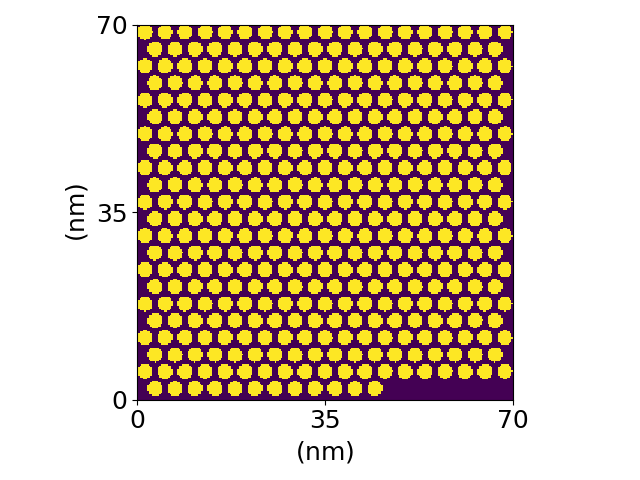

<IPython.core.display.Javascript object>


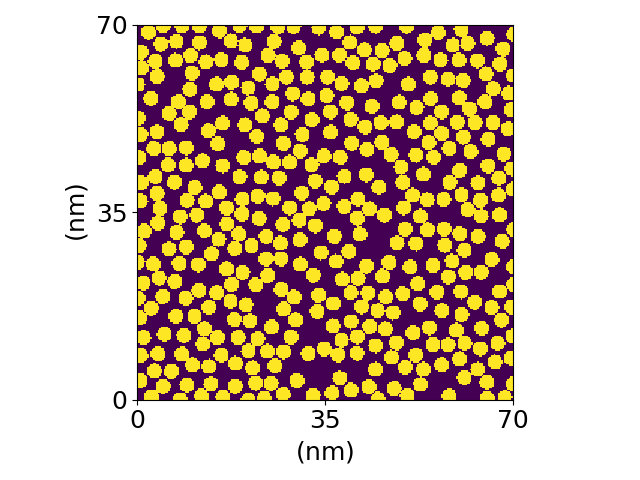

In [38]:
plt.subplots()
plt.imshow(im,extent=(xx[0,0],xx[0,-1],xx[0,0],xx[0,-1]))
plt.xlabel(r'$(\rm{nm})$',fontsize=18)
plt.ylabel(r'$(\rm{nm})$',fontsize=18)
plt.yticks([0,35,70])
plt.xticks([0,35,70])
plt.tick_params(labelsize=18)
plt.tight_layout()
plt.subplots()
plt.imshow(im_new,extent=(xx[0,0],xx[0,-1],xx[0,0],xx[0,-1]))
plt.xlabel(r'$(\rm{nm})$',fontsize=18)
plt.ylabel(r'$(\rm{nm})$',fontsize=18)
plt.yticks([0,35,70])
plt.xticks([0,35,70])
plt.tick_params(labelsize=18)
plt.tight_layout()

In [40]:
qx,qy = np.meshgrid(np.linspace(-0.8,0.8,301),np.linspace(-0.8,0.8,301))
def diffraction_pttn(im,xx,yy,qx,qy):
    im = im.flatten()
    xx = xx.flatten()*10
    yy = yy.flatten()*10
    pttn_shape = qx.shape
    qx = qx.flatten()
    qy = qy.flatten()
    real_space = np.vstack((xx,yy)).T
    reciprocal_space = np.vstack((qx,qy))
    im = im.reshape(len(im),1)
    im = np.tile(im,(1,len(qx)))
    fourier = np.exp(1j*np.matmul(real_space,reciprocal_space))
    pttn = im*fourier
    pttn = np.sum(pttn,axis=0)
    pttn = pttn.reshape(pttn_shape)
    return np.abs(pttn)**2

pttn = diffraction_pttn(im,xx,yy,qx,qy)
pttn_new = diffraction_pttn(im_new,xx,yy,qx,qy)

In [ ]:
#pttn = diffraction_pttn(im,xx,yy,qx,qy)

<IPython.core.display.Javascript object>


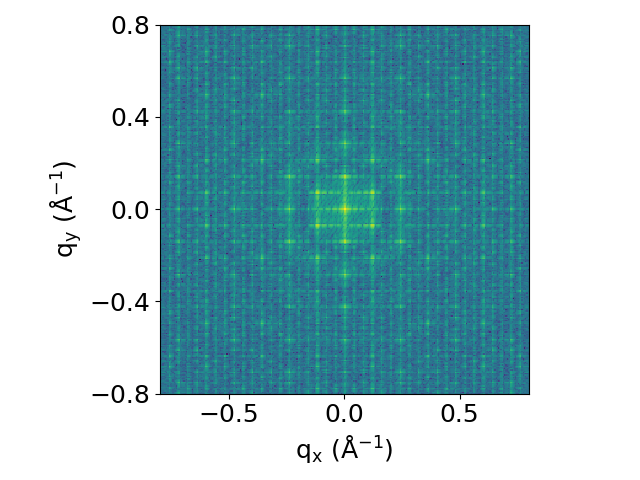

<IPython.core.display.Javascript object>


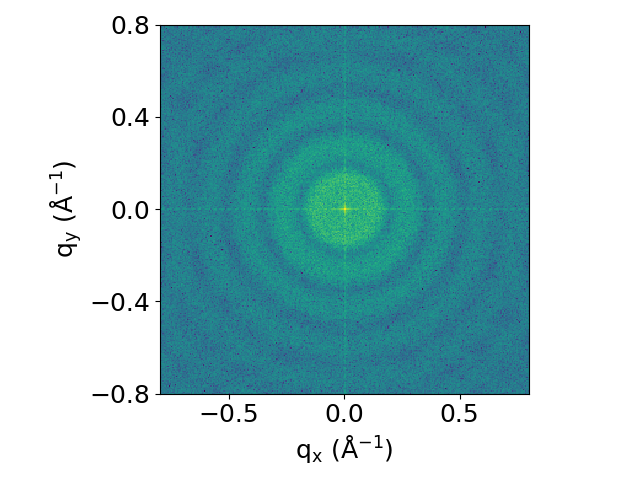

In [21]:
plt.subplots()
plt.imshow(np.log(pttn),extent=(-0.8,0.8,-0.8,0.8))
plt.xlabel(r'$\rm{q_{x}\,\,(\AA^{-1})}$',fontsize=18)
plt.ylabel(r'$\rm{q_{y}\,\,(\AA^{-1})}$',fontsize=18)
plt.yticks([-0.8,-0.4,0.,0.4,0.8])

plt.yticks([-0.8,-0.4,0.,0.4,0.8])
plt.tick_params(labelsize=18)
plt.tight_layout()
plt.subplots()
plt.imshow(np.log(pttn_new),extent=(-0.8,0.8,-0.8,0.8))
plt.xlabel(r'$\rm{q_{x}\,\,(\AA^{-1})}$',fontsize=18)
plt.ylabel(r'$\rm{q_{y}\,\,(\AA^{-1})}$',fontsize=18)
plt.yticks([-0.8,-0.4,0.,0.4,0.8])
plt.yticks([-0.8,-0.4,0.,0.4,0.8])
plt.tick_params(labelsize=18)
plt.tight_layout()

<IPython.core.display.Javascript object>


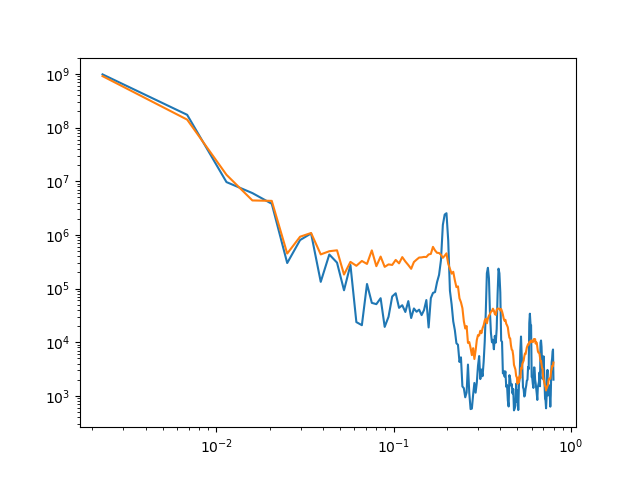

In [43]:
pttn1 = np.copy(pttn)
#pttn1[125,:] = np.nan
#pttn1[:,125] = np.nan

pttn2 = np.copy(pttn_new)
#pttn2[125,:] = np.nan
#pttn2[:,125] = np.nan
qr = np.sqrt(qx**2+qy**2)
qstart = 0
qend   = 0.8
bins = 176
q = (np.linspace(qstart,qend,bins)[1:] + np.linspace(qstart,qend,bins)[:-1])/2
qr1,dqr1 = np.histogram(qr,bins=np.linspace(qstart,qend,bins),weights=np.ones(qr.shape))

is1 = np.abs(pttn1)
In11,dI1 = np.histogram(qr,bins=np.linspace(qstart,qend,bins),weights=is1)
In11 /= qr1

is1 = np.abs(pttn2)
In21,dI1 = np.histogram(qr,bins=np.linspace(qstart,qend,bins),weights=is1)
In21 /= qr1

plt.subplots()
plt.loglog(q,In11,q,In21)

In [44]:
np.savez('mtc_saxs_r1p4_vr60.npz',q=q,I1=In11,I2=In21,im=im,x0=x0,y0=y0,im_new=im_new,x0_new=x0_new,y0_new=y0_new)

In [ ]:
In11_old = np.copy(In11)
In21_old = np.copy(In21)

plt.subplots()
plt.loglog(q,In11,q,In11_old,'--',q,In21,q,In21_old,'--')
plt.xlim(0.001,0.5)

In [ ]:
def rdf(x0,y0,size,r,dr):
    r = np.arange(0,r,dr)
    area = size**2
    rho  = len(x0)/area
    for i in range(len(x0)):
        x = np.delete(x0,i) - x0[i]
        y = np.delete(y0,i) - y0[i]
        dist = (x**2+y**2)**0.5
        for 
    

# here is try to allow the radius variation of particle
def initial_state(size,radius,vol_ratio,max_r=None,resolution=1):
    # here assume the ball is hexogonal aligned within the box, 
    # number of particle determined by vol_ratio
    # assume maximum radius is 6
    if isinstance(max_r,type(None)):
        max_r = radius*1.1
    else:
        max_r = max_r
    # ball radius should be less or equal to max_r
    box_area  = size**2
    n = int((box_area/(np.pi*max_r**2)*vol_ratio))
    ax = size/(n*3**0.5/2)**.5*0.99
    ix = int(np.round(size/ax))
    iy = int(np.round(size/ax*2/3**0.5))
    ay = ax*3**0.5*0.49
    x0 = []
    y0 = []
    r0 = []
    j  = 0
    i  = 0
    pn = 0 # particle number
    xpos = 0
    ypos = 0
    while pn < n:
        #print(j)
        r0.append(radius*np.random.uniform(0.7,1,1))
        if j%2 == 0:
            xpos = i*ax+radius 
            ypos = j*ay+radius
            if (size - xpos) > radius:
                x0.append(i*ax+radius)
                #print(i*ax+radius)
                y0.append(j*ay+radius)
                i  += 1
                pn += 1
            else:
                j += 1
                i = 1
                x0.append(0.5*ax+radius)
                y0.append(j*ay+radius)
                pn += 1
        else:
            xpos = i*ax+0.5*ax+radius 
            ypos = j*ay+radius
            if (size - xpos) > 2*radius:
                x0.append(i*ax+0.5*ax+radius)
                y0.append(j*ay+radius)
                i  += 1
                pn += 1
            elif 0 <= (size - xpos) < 2*radius:
                x0.append(i*ax+0.5*ax+radius)
                y0.append(j*ay+radius)
                x0.append(i*ax+0.5*ax+radius-size)
                y0.append(j*ay+radius)
                j  += 1
                i  = 0
                pn += 1
            else:
                i  = 0
                j  += 1
                x0.append(i*ax+radius)
                y0.append(j*ay+radius)
                i  += 1
                pn += 1
        
    xx,yy = np.meshgrid(np.arange(0,int(size),resolution),
                        np.arange(0,int(size),resolution))
    im = xx*0
    for i in range(n):
        xx1 = xx - x0[i]
        yy1 = yy - y0[i]
        rr  = np.sqrt(xx1**2+yy1**2)
        im1 = (rr<=r0[i]).astype(int)
        im += im1
    return im,x0,y0,xx,yy

In [ ]:
def ribbon(xc,yc,rot,l,w,resolution=1):
    # input of rotate is degree, thus rot has unit of de
    # here just calculate one ribbon coordinate instead of whole box to save computation resource
    x = np.arange(0,l,resolution)
    y = np.arange(0,w,resolution)
    xx,yy = np.meshgrid(x - l/2,y - w/2)
    xx = xx.flatten()
    yy = yy.flatten()
    xx_new = xx*0
    yy_new = yy*0
    rot = np.radians(rot)
    rot_mat = np.array([[np.cos(rot),-np.sin(rot)],[np.sin(rot),np.cos(rot)]])
    coord = np.vstack((xx,yy))
    coord = np.matmul(rot_mat,coord)
    coord[0] += xc
    coord[1] += yc
    return coord

In [ ]:
def ribbon_within_imag(xx,yy,xc,yc,rot,l,w,resolution=1):
    # input of rotate is degree, thus rot has unit of de
    # here just calculate one ribbon coordinate instead of whole box to save computation resource
    shape = xx.shape
    xx = xx.flatten() - xc
    yy = yy.flatten() - yc
    rot = np.radians(rot)
    rot_mat = np.array([[np.cos(rot),-np.sin(rot)],[np.sin(rot),np.cos(rot)]])
    coord = np.vstack((xx,yy))
    coord = np.matmul(rot_mat,coord)
    xx = coord[0].reshape(shape)
    yy = coord[1].reshape(shape)
    im = ((np.abs(xx)<=l/2)&(np.abs(yy)<=w/2)).astype(int)
    return im

def initial_state_ribbon(size,l,w,vol_ratio,rot=0,
                         max_l=None,max_w=None,resolution=1):
    # here assume the ribbon is irregular hexogonal aligned within the box, 
    # number of particle determined by vol_ratio
    # 
    if isinstance(max_l,type(None)):
        max_l = l*1.1
    else:
        max_l = max_l
    if isinstance(max_w,type(None)):
        max_w = w*1.3
    else:
        max_w = max_w
    # 
    box_area  = size**2
    n = int((box_area/(l*w)*vol_ratio))
    #print(n)
    ax = max_l
    ix = int(np.round(size/ax))
    ay = max_w
    iy = int(np.round(size/ay))
    x0 = []
    y0 = []
    j  = 0
    i  = 0
    pn = 0 # particle number
    xpos = 0
    ypos = 0
    while pn < n:
        #print(j)
        if j%2 == 0:
            xpos = i*ax+l/2
            ypos = j*ay+w/2
            if (size - xpos) > +l/2:
                x0.append(i*ax+l/2)
                #print(i*ax+radius)
                y0.append(j*ay+w/2)
                i  += 1
                pn += 1
            else:
                j += 1
                i = 1
                x0.append(0.5*ax+l/2)
                y0.append(j*ay+w/2)
                pn += 1
        else:
            xpos = i*ax+0.5*ax+l/2
            ypos = j*ay+w/2
            if (size - xpos) > l:
                x0.append(i*ax+0.5*ax+l/2)
                y0.append(j*ay+w/2)
                i  += 1
                pn += 1
            elif 0 <= (size - xpos) < l:
                x0.append(i*ax+0.5*ax+l/2)
                y0.append(j*ay+w/2)
                x0.append(i*ax+0.5*ax+l/2-size)
                y0.append(j*ay+w/2)
                j  += 1
                i  = 0
                pn += 1
            else:
                i  = 0
                j  += 1
                x0.append(i*ax+l/2)
                y0.append(j*ay+w/2)
                i  += 1
                pn += 1
        
    xx,yy = np.meshgrid(np.arange(0,int(size),resolution),
                        np.arange(0,int(size),resolution))
    im = xx*0
    for i in range(n):
        im1 = ribbon_within_imag(xx,yy,x0[i],y0[i],rot,l,w,resolution=1)
        im += im1
    return im,x0,y0,xx,yy

In [ ]:
l = 6
w = 2
#max_l     = 7
#max_w     = 3
vol_ratio = 0.6
size = 51
im,x0,y0,xx,yy = initial_state_ribbon(size,l,w,vol_ratio,rot=0,
                         max_l=l*1.3,max_w=w*1.2,resolution=0.25)

In [ ]:
plt.subplots()
plt.imshow(im)
#l = 6
#w = 2

#plt.subplots()
#plt.imshow(ribbon_within_imag(xx,yy,10,10,10,l,w,resolution=0.1)+
#           ribbon_within_imag(xx,yy,15,10,30,l,w,resolution=0.1))

In [ ]:
x0_old = np.copy(x0)
y0_old = np.copy(y0)

In [ ]:
x0_old

coord1,coord2

coord1 = ribbon(10,10,10,l,w,resolution=1)
coord2 = ribbon(16,10,30,l,w,resolution=1)
mini_dist = 10
for _ in range(coord1.shape[1]):
    for __ in range(coord2.shape[1]):
        dist = ((coord1[0,_]-coord2[0,__])**2+
              (coord1[1,_]-coord2[1,__])**2)**0.5
        mini_dist = np.min((mini_dist,dist))
        print(dist,mini_dist)

In [ ]:
plt.subplots()
plt.hist(np.random.normal(0,4,5000))

In [ ]:
def random_walk_ribbon(iteration,step,sigma_rot,x0,y0,im,xx,yy,l,w,resolution=0.2):
    rot = np.zeros((len(x0),))
    coord = []
    for i in range(len(x0)):
        coord.append(ribbon(x0[i],y0[i],rot[i],l,w))
    coord = np.array(coord)
    radius = np.max((l,w))*2
    
    for j in range(iteration):
        for i in range(len(x0)):
            x_old = np.copy(x0[i])
            y_old = np.copy(y0[i])
            rot_old = np.copy(rot[i])
            
            u   = np.random.uniform(0,1,1)*step
            phi = np.radians(np.random.uniform(0,360,1))
            x_new = np.copy(x0[i]) + u*np.cos(phi)
            y_new = np.copy(y0[i]) + u*np.sin(phi)
            rot0   = np.random.normal(0,sigma_rot)
            #considering particle close to edge or leave box from one side will enter from another side
            if x_new > size:
                x_new = x_new - size
            if y_new > size:
                y_new = y_new - size
                
            if x_new < 0:
                x_new = x_new + size
            if y_new < 0:
                y_new = y_new + size
            coord_new = np.array(ribbon(x_new,y_new,rot0,l,w))
            #coord_new = coord_new.reshape((1,coord_new.shape[0],coord_new.shape[1]))
            #coord_new = np.tile(coord_new,(int(len(x0)-1),1,1))
            '''
            mini_dist = radius
            for _ in range(len(x0)):
                if _ == i:
                    pass
                else:
                    if ((x_new-x0[_])**2+(y_new-y0[_])**2)**0.5 >2*radius:
                        pass
                    else:
                        for __ in range(coord_new.shape[1]):
                            for ___ in range(coord_new.shape[1]):
                                #print(__,___,coord[_,0,__] - coord_new[0,___])
                                dist = ((coord[_,0,__] - coord_new[0,___])**2+
                                        (coord[_,1,__] - coord_new[1,___])**2)**.5
                                mini_dist = np.min((mini_dist,dist))
                                #print(mini_dist)
            x_new_array = np.delete(x0,i) - x_new
            y_new_array = np.delete(y0,i) - y_new
            dist = (x_new_array**2+y_new_array**2)**.5
                
            if np.size(dist[dist<radius*2]) > 0:
                
            if mini_dist < 1:
            '''
            x_new_array = np.abs(np.delete(x0,i) - x_new)
            y_new_array = np.abs(np.delete(y0,i) - y_new)
            if (np.size(x_new_array[(x_new_array<l)&(y_new_array<w)])>0):
                    #print(np.size(x_new_array[x_new_array<l]))
                    #print(np.size(dist[dist<radius*2]))
                    #print(1)
                    x0[i] = x_old
                    y0[i] = y_old
                    rot[i] = rot_old
            else:                
                x0[i] = x_new
                y0[i] = y_new
                rot[i] = rot0
                coord[i,:] = coord_new
                            
        if j%100 == 0:
            print(f'{j} iterations finished')
            
    im = xx*0
    for i in range(len(x0)):
        im1 = ribbon_within_imag(xx,yy,x0[i],y0[i],rot[i],l,w,resolution=resolution)
        im += im1
    return im,x0,y0,rot

In [ ]:
iteration = 2000
step = w/2
x0   = x0
y0   = y0
im   = im
xx   = xx
yy   = yy
size   = size
l = 6
w = 2
size = 51
sigma_rot = 0.001
im_new,x0_new,y0_new,rot = random_walk_ribbon(iteration,step,sigma_rot,x0,y0,im,xx,yy,l,w,resolution=1)

In [ ]:
plt.subplots()
plt.imshow(im_new)

In [ ]:
#np.sum(im_new)/201**2
im_new[im_new>1] = 1.

In [ ]:
pttn = diffraction_pttn(im,xx,yy,qx,qy)
pttn_new = diffraction_pttn(im_new,xx,yy,qx,qy)

In [ ]:
plt.subplots()
plt.imshow(np.log(pttn),extent=(-0.3,0.3,-0.3,0.3))
plt.subplots()
plt.imshow(np.log(pttn_new),extent=(-0.3,0.3,-0.3,0.3))

In [ ]:
pttn_new.shape

In [ ]:
qr = np.sqrt(qx**2+qy**2)
qstart = 0
qend   = 0.5
bins = 151
q = (np.linspace(qstart,qend,bins)[1:] + np.linspace(qstart,qend,bins)[:-1])/2
qr1,dqr1 = np.histogram(qr,bins=np.linspace(qstart,qend,bins),weights=np.ones(qr.shape))

is1 = np.abs(pttn)
In11,dI1 = np.histogram(qr,bins=np.linspace(qstart,qend,bins),weights=is1)
In11 /= qr1

is1 = np.abs(pttn_new)
In21,dI1 = np.histogram(qr,bins=np.linspace(qstart,qend,bins),weights=is1)
In21 /= qr1

plt.subplots()
plt.loglog(q,In11,q,In21)
#plt.plot(q,np.mean(pttn_new[141:161,151:],axis=0))

In [ ]:
pttn_new[151,141:161].shape

In [ ]:
#np.savez('mtc_saxs_rect_l6w2_vr60_2.npz',q=q,I1=In11,I2=In21,im=im,x0=x0,y0=y0,im_new=im_new,x0_new=x0_new,y0_new=y0_new)

In [ ]:
def random_walk_ribbon(iteration,step,sigma_rot,x0,y0,im,xx,yy,l,w,resolution=0.2):
    rot = np.zeros((len(x0),))
    coord = []
    for i in range(len(x0)):
        coord.append(ribbon(x0[i],y0[i],rot[i],l,w))
    coord = np.array(coord)
    radius = np.max((l,w))*2
    x0 = np.copy(x0)
    y0 = np.copy(y0)
    
    for j in range(iteration):
        for i in range(len(x0)):
            x_old = np.copy(x0[i])
            y_old = np.copy(y0[i])
            rot_old = np.copy(rot[i])
            
            u   = np.random.uniform(0,1,1)*step
            phi = np.radians(np.random.uniform(0,360,1))
            x_new = np.copy(x0[i]) + u*np.cos(phi)
            y_new = np.copy(y0[i]) + u*np.sin(phi)
            rot0   = np.random.normal(0,sigma_rot)
            #considering particle close to edge or leave box from one side will enter from another side
            if x_new > size:
                x_new = x_new - size
            if y_new > size:
                y_new = y_new - size
                
            if x_new < 0:
                x_new = x_new + size
            if y_new < 0:
                y_new = y_new + size
            coord_new = np.array(ribbon(x_new,y_new,rot0,l,w))
            #coord_new = coord_new.reshape((1,coord_new.shape[0],coord_new.shape[1]))
            #coord_new = np.tile(coord_new,(int(len(x0)-1),1,1))
            
            mini_dist = radius
            for _ in range(len(x0)):
                if _ == i:
                    pass
                else:
                    if ((x_new-x0[_])**2+(y_new-y0[_])**2)**0.5 >2*radius:
                        pass
                    else:
                        for __ in range(coord_new.shape[1]):
                            for ___ in range(coord_new.shape[1]):
                                #print(__,___,coord[_,0,__] - coord_new[0,___])
                                dist = ((coord[_,0,__] - coord_new[0,___])**2+
                                        (coord[_,1,__] - coord_new[1,___])**2)**.5
                                mini_dist = np.min((mini_dist,dist))
                                #print(mini_dist)
            
                
            if mini_dist < 0.5:
            
            #x_new_array = np.abs(np.delete(x0,i) - x_new)
            #y_new_array = np.abs(np.delete(y0,i) - y_new)
            #if (np.size(x_new_array[(x_new_array<l)&(y_new_array<w)])>0):
                    #print(np.size(x_new_array[x_new_array<l]))
                    #print(np.size(dist[dist<radius*2]))
                    #print(1)
                    x0[i] = x_old
                    y0[i] = y_old
                    rot[i] = rot_old
            else:                
                x0[i] = x_new
                y0[i] = y_new
                rot[i] = rot0
                coord[i,:] = coord_new
                            
        if j%100 == 0:
            print(f'{j} iterations finished')
            
    im = xx*0
    for i in range(len(x0)):
        im1 = ribbon_within_imag(xx,yy,x0[i],y0[i],rot[i],l,w,resolution=resolution)
        im += im1
    return im,x0,y0,rot

In [ ]:
iteration = 20
step = w/2
x0   = x0
y0   = y0
im   = im
xx   = xx
yy   = yy
size   = size
l = 6
w = 2
size = 51
sigma_rot = 1
im_new,x0_new,y0_new,rot_new = random_walk_ribbon(iteration,step,sigma_rot,x0,y0,im,xx,yy,l,w,resolution=1)

In [ ]:
plt.subplots()
plt.imshow(im_new)

In [ ]:
x0